### Initialize and collect ohlcv data

In [1]:
import sys
sys.path.append('/Users/araschang/Desktop/coding/binance_trading_bot/')
import datetime
import time
import pandas as pd
from binance.client import Client
from binance.enums import HistoricalKlinesType
from Module.indicators import *
import Module.constants as const


# input parameters
symbol = 'BTCUSDT'
interval = '5m'


def collect_historical_price(client, symbol='ETHUSDT', interval='15m'):
    ########## READING HISTORIC PRICE AND ADDING INDICATORS##########

    df_his = pd.DataFrame(
        client.get_historical_klines(symbol, interval, klines_type=HistoricalKlinesType.FUTURES))
    df_his = df_his.drop(columns=[6, 7, 8, 9, 10, 11])
    df_his.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

    # converting unix to datetime
    df_his['Date'] = pd.to_numeric(df_his['Date'])
    df_his['Date'] = df_his['Date'] / 1000
    for i in range(len(df_his.index)):
        df_his['Date'][i] = datetime.datetime.fromtimestamp(df_his['Date'][i])
    # converting str to int
    df_his['Open'] = pd.to_numeric(df_his['Open'])
    df_his['High'] = pd.to_numeric(df_his['High'])
    df_his['Low'] = pd.to_numeric(df_his['Low'])
    df_his['Close'] = pd.to_numeric(df_his['Close'])
    df_his['Volume'] = pd.to_numeric(df_his['Volume'])
    df_his.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    return df_his


########## INITIALIZING ##########

api_key = const.binance_future_api_key
api_secret = const.binance_future_api_secret
client = Client(api_key, api_secret, testnet=False)
client.API_URL = 'https://api1.binance.com' 
try:
    df = collect_historical_price(client=client, symbol=symbol, interval=interval)
except Exception:
    print('THERE IS SOMETHING WRONG WITH API......')
df.tail()


ModuleNotFoundError: No module named 'Module'

In [269]:
df = pd.read_csv('/Users/araschang/Desktop/backtestdata_btc_5m.csv')

df = df.drop(['Unnamed: 0', 'close_time','quote_volume','count','taker_buy_volume','taker_buy_quote_volume','ignore'], axis=1)
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df['date'] = pd.to_numeric(df['date'])
df['date'] = df['date'] / 1000
for i in range(len(df.index)):
    df['date'][i] = datetime.datetime.fromtimestamp(df['date'][i])
# converting str to int
df['open'] = pd.to_numeric(df['open'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['close'] = pd.to_numeric(df['close'])
df['volume'] = pd.to_numeric(df['volume'])

df

,date,open,high,low,close,volume
0,2022-01-01 08:05:00,46316.17,46530.99,46275.00,46372.32,1260.156
1,2022-01-01 08:10:00,46372.31,46389.93,46270.00,46335.10,563.988
2,2022-01-01 08:15:00,46335.10,46338.65,46239.00,46296.93,508.058
3,2022-01-01 08:20:00,46296.97,46422.00,46290.44,46398.59,524.820
4,2022-01-01 08:25:00,46398.59,46403.99,46351.17,46378.60,262.512
...,...,...,...,...,...,...
43332,2022-06-01 07:35:00,31880.60,31891.70,31839.10,31864.50,612.637
43333,2022-06-01 07:40:00,31864.60,31864.60,31821.90,31827.60,433.758
43334,2022-06-01 07:45:00,31827.70,31859.30,31825.20,31850.10,308.041
43335,2022-06-01 07:50:00,31850.10,31913.60,31811.30,31811.30,625.240


### Indicators

In [289]:
import numpy as np
import pandas_ta as ta

def concat(df1, list1):
    list1 = pd.DataFrame(list1).T
    list1.columns = ['Start', 'End', 'Ratio']
    return pd.concat([df1, list1], axis=0, ignore_index=True)

a = 10
b = 54
c = 13
df['ATR'] = ATR(df, period=c)
df['5ema'] = EMA(df, a)
df['20ema'] = EMA(df, b)
high = pd.Series(df['high'])
low = pd.Series(df['low'])
close = pd.Series(df['close'])
df['super'] = pd.DataFrame(ta.supertrend(high, low, close))['SUPERTd_7_3.0']

df

,date,open,high,low,close,volume,ATR,5ema,20ema,super
0,2022-09-09 00:35:00,19177.6,19188.8,19145.5,19146.1,2137.389,NaN,NaN,NaN,1
1,2022-09-09 00:40:00,19146.1,19211.9,19137.0,19195.9,2860.426,NaN,NaN,NaN,1
2,2022-09-09 00:45:00,19195.9,19197.7,19168.6,19172.8,897.480,NaN,NaN,NaN,1
3,2022-09-09 00:50:00,19172.8,19199.6,19165.5,19174.0,1266.361,NaN,NaN,NaN,1
4,2022-09-09 00:55:00,19174.1,19189.1,19164.4,19178.7,904.540,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
995,2022-09-12 11:30:00,21694.4,21702.0,21540.0,21573.2,11538.930,109.523139,21762.774353,21717.935804,-1
996,2022-09-12 11:35:00,21573.1,21620.0,21562.8,21596.0,3801.616,102.048405,21747.613049,21715.718790,-1
997,2022-09-12 11:40:00,21596.0,21628.3,21551.6,21618.9,2339.391,98.427204,21735.911862,21713.958448,-1
998,2022-09-12 11:45:00,21618.9,21653.3,21581.4,21596.8,2840.523,94.637604,21723.265329,21711.828294,-1


### Backtesting

In [283]:
ret = []
signal = ''
transaction = pd.DataFrame([1,1,1]).T
transaction.columns = ['Start', 'End', 'Ratio']
trans = []
start_price = 0

for i in range(len(df)):

    if signal == '':
        ret.append(0)
        if df['close'][i]>df['5ema'][i]>df['20ema'][i]:
            signal = 'BUY'
            stop_loss = df['close'][i] - df['ATR'][i]
            # Don't touch
            trans.append(df['date'][i])
            start_price = df['close'][i]

        elif df['close'][i]<df['5ema'][i]<df['20ema'][i]:
            signal = 'SELL'
            stop_loss = df['close'][i] + df['ATR'][i]
            # Don't touch
            trans.append(df['date'][i])
            start_price = df['close'][i]
    
    elif signal == 'BUY':
        if df['close'][i]<df['5ema'][i]:  # stop profit
            signal = ''

            # Don't touch
            ret.append((df['close'][i]/df['close'][i-1])-1)
            trans.append(df['date'][i])
            trans.append((df['close'][i] - start_price)/start_price)
            transaction = concat(transaction, trans)
            trans = []
            start_price = 0
        
        else:
            # Don't touch
            ret.append((df['close'][i]/df['close'][i-1])-1)
    
    elif signal == 'SELL':
        if df['close'][i]>df['5ema'][i]:  # normal stop profit
            signal = ''

            # Don't touch
            ret.append((df['close'][i-1]/df['close'][i])-1)
            trans.append(df['date'][i])
            trans.append((start_price - df['close'][i])/start_price)
            transaction = concat(transaction, trans)
            trans = []
            start_price = 0

        else:
            # Don't touch
            ret.append((df['close'][i-1]/df['close'][i])-1)

# Don't touch
transaction['Ratio'] = 100 * transaction['Ratio']
transaction = transaction.drop([0])
sum = transaction['Ratio'].sum()

# Total profit ratio and KPIs
ret = pd.DataFrame(ret, columns=['ret'])
winrate = transaction['Ratio'][transaction['Ratio']>0].count() / len(transaction)
print('Profit ratio(%):',sum)
print('Win rate(%):', winrate*100)
print('CAGR:',CAGR(ret))
print('Sharpe ratio:', sharpe(ret, 0.0343))
print('Max drawdown:', max_dd(ret))

Profit ratio(%): 3.600690533530191
Win rate(%): 20.77922077922078
CAGR: 33.77380801362588
Sharpe ratio: 168.0040585964919
Max drawdown: 0.05345947581644601


### Plotting

<AxesSubplot:>

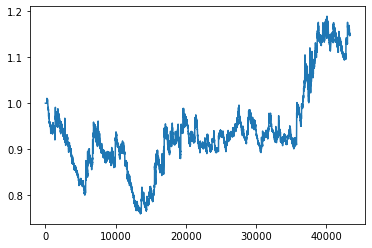

In [278]:
(1+ret["ret"]).cumprod().plot()

In [97]:
ret

,ret
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
995,0.003360
996,-0.000300
997,0.001668
998,0.002706
